# 1. 線形回帰モデル

本書は、機械学習レポートの、線形回帰モデルについてです。


## 1.1. 要点まとめ

線形回帰モデルでは、予測値の線形結合である
$ \hat y_i = \textbf{x}_i^T \cdot \textbf{w} $ によって、予測を行う。<br>
線形回帰の目的は、 $\textbf{w}$ を m 次元とすると、
$ \textbf{w} = \begin{pmatrix}
w_0 &
w_1 &
w_2 &
... &
w_m &
\end{pmatrix}$ の一つ一つを求めること。 <br>
$ \hat y_i = \textbf{x}_i^T \cdot \textbf{w} $ の部分を展開すると、以下となり、講義の 1:02:28 の $ m = 2 $ (2次元) の式を $ m $ 次元にしたものに相当する。

$$
\hat y_i =
\begin{pmatrix}
1 & x_{i1} & x_{i2} & ... & x_{im} \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
... \\
w_m \\
\end{pmatrix} \\
=
\begin{pmatrix}
w_0 +
w_1x_{i1} +
w_2x_{i2} +
... +
w_m x_{im}
\end{pmatrix}
$$

予測値 $ \hat y_i $ は、スカラー値となる。


- NOTE: [Vapnikの原理 - Nodewww](https://scrapbox.io/Nodewww/Vapnik%E3%81%AE%E5%8E%9F%E7%90%86)<br>
講義の中で紹介された原理。分類で解ける問題を回帰で解くべきではない。<br>
> ある問題を解くとき，その問題よりも難しい問題を途中の段階で解いてはならない


もし、説明変数が1次元 ( $ m = 1 $ ) の場合、単回帰モデルと呼ぶ。<br>
その場合の連立方程式を行列で表すと、以下の通り。

$$
\textbf{y} = X \textbf{w} \\
\to
\begin{pmatrix}
y_1 \\
y_2 \\
\cdots \\
y_n \\
\end{pmatrix}
=
\begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\cdots \\
1 & x_n \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1
\end{pmatrix}
$$


説明変数が、多次元 ( $ m > 1 $ ) の場合、線形重回帰分析モデルと呼ぶ。
その場合の連立方程式を行列で表すと、以下の通り。

$$
\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{11} & x_{12} & ... & x_{1m} \\
1 & x_{21} & x_{22} & ... & x_{2m} \\
... \\
1 & x_{n1} & x_{n2} & ... & x_{nm} \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
... \\
w_m
\end{pmatrix}
$$


線形回帰では、平均二乗誤差(以降、 MSE と略す)を最小にする
パラメータ $ \hat w $ ( m 次元 ) を求める。

$$
\hat w = \arg \min\limits_{\textbf{w} \in \mathbb{R}^{+1}} MSE_train
$$


- NOTE: 二乗損失は外れ値に弱い<br>
Huber 損失、Tukey 損失によって回避できる場合がある。


MSE を微分したものが 0 となる $ w $ の点を求めることになる。<br>
MSE の微分の展開は、以下の通り。

$$
\frac{\partial}{\partial\textbf{w}} \{
    \frac{1}{n} \sum_{i=1}^n ( \hat y_i - y_ i )^2
\} = 0 \\
\to
\frac{\partial}{\partial\textbf{w}} \{
    \frac{1}{n} \sum_{i=1}^n (
        \textbf{x}_i^T \cdot \textbf{w} - y_i
    )^2
\} = 0 \\
\because
\hat y_i = \textbf{w}^T \cdot \textbf{x}_i \\
$$


$$
\to
\frac{\partial}{\partial\textbf{w}} \{
    \frac{1}{n}
    (X\textbf{w} - \textbf{y})^T
    (X\textbf{w} - \textbf{y})
\} = 0 \\
$$


- NOTE: 上記の式について、逆算して展開結果を確認した。


$ X\textbf{w} - \textbf{y} $ を展開すると、

$$
\begin{pmatrix}
1 & x_{11} & x_{12} & ... & x_{1m} \\
1 & x_{21} & x_{22} & ... & x_{2m} \\
... \\
1 & x_{n1} & x_{n2} & ... & x_{nm} \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
... \\
w_m
\end{pmatrix}
-
\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{pmatrix}
$$


$$
\to
\begin{pmatrix}
w_0 + x_{11}w_1 + x_{12}w_2 + ... + x_{1m}w_m \\
w_0 + x_{21}w_2 + x_{22}w_2 + ... + x_{2m}w_2 \\
... \\
w_0 + x_{n1}w_1 + x_{n2}w_2 + ... + x_{nm}w_m \\
\end{pmatrix}
-
\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{pmatrix}
$$


$$
\to
\begin{pmatrix}
w_0 + x_{11}w_1 + x_{12}w_2 + ... + x_{1m}w_m - y_1 \\
w_0 + x_{21}w_2 + x_{22}w_2 + ... + x_{2m}w_2 - y_2 \\
... \\
w_0 + x_{n1}w_1 + x_{n2}w_2 + ... + x_{nm}w_m - y_n \\
\end{pmatrix}
$$


$ (X\textbf{w} - \textbf{y})^T $ は、上記を転置して、

$$
\begin{pmatrix}
w_0 + x_{11}w_1 + x_{12}w_2 + ... + x_{1m}w_m - y_1 \\
w_0 + x_{21}w_2 + x_{22}w_2 + ... + x_{2m}w_2 - y_2 \\
... \\
w_0 + x_{n1}w_1 + x_{n2}w_2 + ... + x_{nm}w_m - y_n \\
\end{pmatrix}^T
$$


$$
=
\begin{pmatrix}
w_0 + x_{11}w_1 + x_{12}w_2 + ... + x_{1m}w_m - y_1 &
w_0 + x_{21}w_2 + x_{22}w_2 + ... + x_{2m}w_2 - y_2 &
... &
w_0 + x_{n1}w_1 + x_{n2}w_2 + ... + x_{nm}w_m - y_n
\end{pmatrix}
$$


よって、

$$
(X\textbf{w} - \textbf{y})^T (X\textbf{w} - \textbf{y}) \\
=
( w_0 + x_{11}w_1 + x_{12}w_2 + ... + x_{1m}w_m - y_1 )^2
+ (w_0 + x_{21}w_2 + x_{22}w_2 + ... + x_{2m}w_2 - y_2)^2
+ ...
+ (w_0 + x_{n1}w_1 + x_{n2}w_2 + ... + x_{nm}w_m - y_n)^2
$$


$$
=
\sum_{i=1}^n (
        \textbf{x}_i^T \cdot \textbf{w} - y_i
)^2
$$

$$
\sum_{i=1}^n (
        \textbf{x}_i^T \cdot \textbf{w} - y_i
)^2
=
(X\textbf{w} - \textbf{y})^T (X\textbf{w} - \textbf{y})
$$

となることを確認した。


- NOTE: 以降より、 MSE の微分の展開に戻る。


続いて、

$
\frac{\partial}{\partial\textbf{w}} \{
    \frac{1}{n}
    (X\textbf{w} - \textbf{y})^T
    (X\textbf{w} - \textbf{y})
\} = 0 \\
\to
\frac{1}{n}
\frac{\partial}{\partial\textbf{w}} \{
    (\textbf{w}^TX^T - \textbf{y}^T)
    (X\textbf{w} - \textbf{y})
\} = 0 \\
$


$$
\to
\frac{1}{n}
\frac{\partial}{\partial\textbf{w}} \{
    \textbf{w}^TX^T X\textbf{w}
    - \textbf{w}^TX^T \textbf{y}
    - \textbf{y}^T X\textbf{w}
    + \textbf{y}^T \textbf{y}
\} = 0 \\
\to
\frac{1}{n}
\frac{\partial}{\partial\textbf{w}} \{
    \textbf{w}^TX^T X\textbf{w}
    - 2 \textbf{w}^TX^T \textbf{y}
    + \textbf{y}^T \textbf{y}
\} = 0 \\
$$


$ \textbf{w} $ で微分する。

$$
\to
\frac{1}{n}
\{
  2 X^T X \textbf{w}
  - 2 X^T \textbf{y}
\} = 0 \\
$$

これは、以下の適用による。

$$
\frac{ \partial ( \textbf{w}^T \textbf{x} ) }
{ \partial \textbf{w} }
= \textbf{x}
\\
\frac{ \partial ( \textbf{w}^T A \textbf{w} ) }
{ \partial \textbf{w} }
= ( A + A^T ) \textbf{x} \\
= 2 A \textbf{x} \\
\because A: 対称行列 ( A^T = A )
$$

- NOTE: 適用に使った式は、以下を参考にする。<br>
[The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)



両辺に $ n $ を掛けて、

$$
\to
2 X^T X \cdot \textbf{w}
- 2 X^T \textbf{y}
= 0 \\
\to
2 X^T X \cdot \textbf{w}
= 2 X^T \cdot \textbf{y} \\
\to
X^T X \cdot \textbf{w} = X^T \cdot \textbf{y}
$$


両辺に $ ( X^TX )^{-1} $ を掛ける。

$$
\to
( X^TX )^{-1} X^T X \cdot \textbf{w}
=
( X^TX )^{-1} \cdot X^T \cdot \textbf{y}
$$

$
A^{-1} \cdot A = I
$
だから、

$$
\to
\textbf{w} = ( X^TX )^{-1} \cdot X^T \cdot \textbf{y} \\
$$

これが、回帰係数の式となる。

$$
\hat {\textbf{w}}
=
( X^{(train)T} X^{(train)} )^{-1} X^{(train)T} \textbf{w}^{(train)}
$$


予測値は、以下となる。

$$
\hat{\textbf{y}}
=
X_{n_{new} \times m + 1} ( X^{(train)^T} X^{(train)} )^{-1} X^{(train)}\textbf{y}^{(train)}
$$


新たな説明変数を、 $ X_* $ とすると、

$$
\hat{\textbf{y}} = X_* \cdot \hat{\textbf{w}} \\
=
X_* \cdot (X^T X)^{-1} X^T \textbf{y}
$$

$ X_* $ は、予測したい新たな入力点 ( $n_*$ 個 ) <br>
$ n_* \times ( m + 1) $ 行列である。

$$
X_*
=
\begin{pmatrix}
1 & x^*_{11} & x^*_{12} & ... & x^*_{1m} \\
1 & x^*_{21} & x^*_{22} & ... & x^*_{2m} \\
... \\
1 & x^*_{n1} & x^*_{n2} & ... & x^*_{nm} \\
\end{pmatrix}
$$


また、以下の下線部分を「射影行列」という。 ( $\textbf{y}$ の前まで )

$$
\underline{X_* \cdot \hat{\textbf{w}} = X_* \cdot (X^T X)^{-1} X^T} \textbf{y}
$$

- NOTE: 参考<br>
[射影行列 - Qiita](https://qiita.com/takseki/items/e0de89ab82d4d287a0d7)<br>
[直交行列と射影行列 - YouTube](https://www.youtube.com/watch?v=2jMFR9YpzvA)


また、逆行列は常に存在するわけではない。

- NOTE: 参考<br>
[【大学数学】線形代数入門⑩(逆行列：定義)【線形代数】 - YouTube](https://www.youtube.com/watch?v=FbAKS6OY0k0)


## 1.2. 実装演習

「機械学習実装演習コード」に含まれる、以下を使用して、実装演習を行った。

1. np_regression.ipynb
2. skl_regression.ipynb


### np_regression.ipynb


#### キャプチャ

自身の環境において、最終コードセル[18]までの実行を確認した。

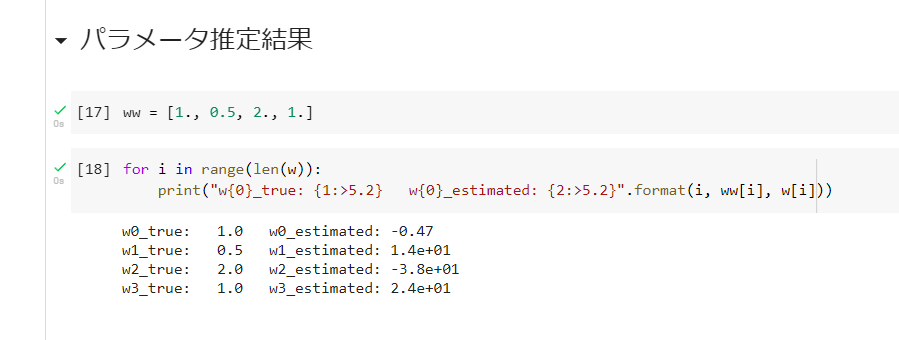

#### 内容

実装演習の際、調べた内容についてのノートを記録する。


##### 単回帰

学習(コードセル[4]上)に記載されている式(1)について、確認した。


$ a $ について、微分。

$$
L = \sum_{i=1}^{n} \left( y_{i} - (a x_{i} + b) \right)^2
$$

$$
u = y_{i} - (a x_{i} + b) \\
\to
\partial \frac{dL}{du}
\sum_{i=1}^{n} u^2
\partial \frac{du}{da}
\sum_{i=1}^{n}(
  y_{i} - (a x_{i} + b)
) \\
\to
\sum_{i=1}^{n} 2u
\sum_{i=1}^{n}(
- x_{i}
) \\
\to
\sum_{i=1}^{n} 2u
(- x_{i}
) \\
\to
-2
\sum_{i=1}^{n} u x_{i} \\
\to
-2
\sum_{i=1}^{n} (y_{i} - (a x_{i} + b)) x_{i} \\
$$


同様にして、 $ \frac{dL}{db} $ は、

$$
L = \sum_{i=1}^{n} \left( y_{i} - (a x_{i} + b) \right)^2 \\
\frac{\partial L}{\partial b} (
  \sum_{i=1}^{n} \left( y_{i} - (a x_{i} + b) \right)^2
) = 0 \\
$$

$ u = y_{i} - (a x_{i} + b) $ とする。

$$
\frac{\partial L}{\partial b}
=
\frac{\partial L}{\partial u}
\frac{\partial u}{\partial b}
$$


$$
\to
\frac{\partial L}{\partial u} (
  u^2
)
\frac{\partial u}{\partial b} (
  y_{i} - (a x_{i} + b)
)
$$


$$
\to
2u
\times
-1
\to
-2 ( y_{i} - (a x_{i} + b) )
$$

よって、
$$
\sum_{i=1}^{n} (
  -2 ( y_{i} - (a x_{i} + b) )
) = 0
$$

$$
-2 \sum_{i=1}^{n} (
  y_{i} - (a x_{i} + b)
) = 0
$$


また、以下の部分の理解のため、共分散について、確認した。

$$
\hat{a} = \text{Cov}[x, y] / \text{Var}[x] \\
\hat{b} = \mu_{y} - \hat{a} \mu_{x}
$$


- [共分散の意味と簡単な求め方 | 高校数学の美しい物語](https://manabitimes.jp/math/853)

"共分散の定義と計算例" を計算する。


In [1]:
import numpy as np


In [2]:
def calc_covarience(points):
  point_means = np.mean(points, 0)

  tota_deviation_times = 0
  for index, point in enumerate(points):
    x = 0
    y = 1
    deviation_x = point[x] - point_means[x]
    deviation_y = point[y] - point_means[y]
    deviation_times = deviation_x * deviation_y
    # print("deviation_times=" + str(deviation_times))
    tota_deviation_times += deviation_times

  # print("tota_deviation_times=" + str(tota_deviation_times))

  covarience = tota_deviation_times / len(points)
  return covarience

points = np.array([[50, 50], [50, 70], [80, 60], [70, 90], [90, 100]])
covarience = calc_covarience(points)
covarience


188.0

In [3]:
# "共分散が大きい（正）→ X が大きいとき Y も大きい傾向がある"
points = np.array([[50, 50], [50, 70], [80, 60+30], [70, 90], [90, 100]])
covarience = calc_covarience(points)
covarience


260.0

In [4]:
# "共分散が 0 に近い→ X と Y にあまり関係はない"
points = np.array([[50, 30], [20, 70], [80, 10], [10, 90], [100, 20]])
covarience = calc_covarience(points)
covarience


-968.0

コードセル[4] の、$\text{Var}[x]$ は $ x $ の分散で、 `cov[0, 0]` にすると $ x $ の分散になることを確認した。 ( NumPy のドキュメントの内容の確認 )

> the covariance matrix element C_{ij} is the covariance of
x_i and x_j. The element C_{ii} is the variance
of x_i.


また、 コードセル[5] の 'reshape' の動作についても、ドキュメントを確認した。

- [numpy.reshape](https://numpy.org/devdocs/reference/generated/numpy.reshape.html#numpy.reshape)
<br>

> If an integer, then the result will be a 1-D array of that length. One shape dimension can be -1. 


##### 多項式回帰

学習の( コードセル[8]の下 )、数式について、確認した。

$ y(x) = \boldsymbol{w}^{\mathrm{T}} \boldsymbol{\phi(x)} $ について、

$ w^T $ は列 ベクトル。<br>
$ \phi(x) $ は行 ベクトル。

よって、

$$
\boldsymbol{w}^{\mathrm{T}} \boldsymbol{\phi(x)}
=
w_0 + w_1x + w_2x^2 + \dots + w_dx^d
$$


講義の中では、 $ \Phi_1, \Phi_2 $ の例だった。
これを講義の、少し前の説明での 9 乗までの $ \Phi_9 $ に倣って、書いてみると、


$$
=
\begin{pmatrix}
1 & x_{11} & x_{12}^2 \\
1 & x_{21} & x_{22}^2
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\end{pmatrix}
$$

コードセル[9] の`polynomial_features()` の結果から、上記の様に理解する。


##### 重回帰分析

単価行との違いについて、改めて整理した。

- 参考: [重回帰分析とは | データ分析基礎知識](https://www.albert2005.co.jp/knowledge/statistics_analysis/multivariate_analysis/multiple_regression)

- 単回帰分析<br>
1つの目的変数を1つの説明変数で予測する。

- 重回帰分析<br>
1つの目的変数を複数の説明変数で予測する。

なので、今回の例では "訓練データ生成 (3次元入力)" だから、 3 つの説明変数で 1 つの目的変数を予測する。


また、 "訓練データ生成 (3次元入力)" のイメージを確認したく、コードセル[13] 以降に以下のコードを追加して、予測値が真実の値に対して、近似するイメージを得た。


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


In [6]:
sample_3dim = np.random.random((10, 3))
sample_3dim


array([[0.9243349 , 0.40230209, 0.82906569],
       [0.68495042, 0.74499588, 0.55823592],
       [0.06931187, 0.89109411, 0.88707973],
       [0.65469495, 0.8587675 , 0.58092469],
       [0.52678491, 0.8439008 , 0.32367582],
       [0.89792174, 0.52117933, 0.98898006],
       [0.4526575 , 0.95078163, 0.68804945],
       [0.24538253, 0.16016118, 0.18815153],
       [0.75362983, 0.00367344, 0.04139647],
       [0.42931899, 0.57843707, 0.14681758]])

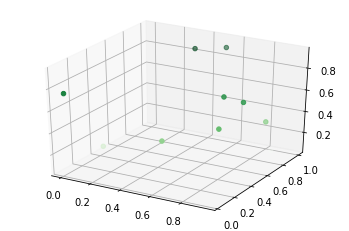

In [7]:
def plot_3d(array_3dim, cmap='Greens'):
  ax = plt.axes(projection='3d')

  zdata = array_3dim[:, 0]
  xdata = array_3dim[:, 1]
  ydata = array_3dim[:, 2]
  ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=cmap);

plot_3d(sample_3dim)


In [8]:
TRUE_PARAMETERS = [1., 0.5, 2., 1.]

n_sample = 100
var = .2

def mul_linear_func(x):
    ww = TRUE_PARAMETERS
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()


In [9]:
x_dim = 3

X = np.random.random((n_sample, x_dim))

print("X.shape={}".format(str(X.shape)))


X.shape=(100, 3)


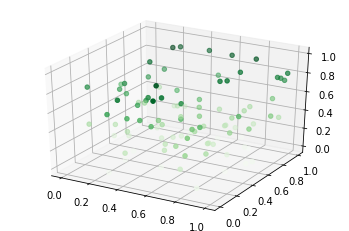

In [10]:
plot_3d(X)


学習のコードセル[16]に以下のコードを追加して、 1次元追加した後の shape を確認した。

```
X_train = add_one(X)
# 追加: `add_one()` の意味?
print("X_train.shape={}".format(str(X_train.shape)))

```


"パラメータ推定結果" において、コードセル[18]の後に、以下のコードを追加して、イメージを得た。

```
def plot_results(ys_true, ys_or_predicted, ys_label="prediction"):
  xs = np.linspace(0, 1, ys_true.size)

  plt.plot(xs, ys_true, label="True values")
  plt.plot(xs, ys_or_predicted, label=ys_label)
  plt.legend()
  plt.show()

plot_results(ys_true, ys, ys_label="ys")

ys_pred = np.dot(X_train, w)

plot_results(ys_true, ys_pred)ys_pred = np.dot(X_train, w)
```


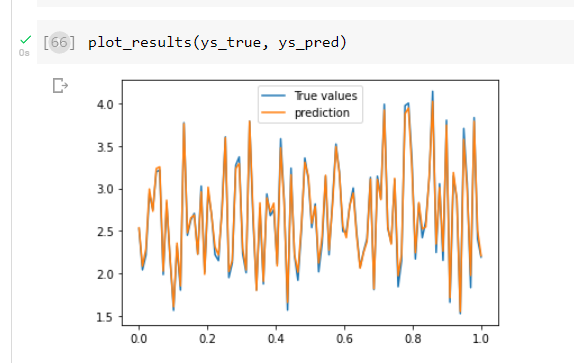

### skl_regression.ipynb


#### キャプチャ

自身の環境において、最終コードセル[38]までの実行を確認した。


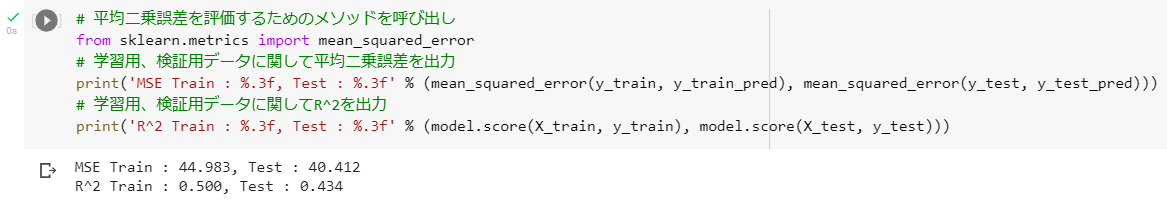

#### 内容

実装演習の際、調べた内容についてのノートを記録する。


##### 線形単回帰分析

コードセル[19] の、1部屋での予測値が、 -25 ドルであったため、
5部屋、10部屋の場合の予測値が正の値となるかを確認した。

```
model.predict([[5]])
array([10.83992413])

model.predict([[10]])
array([56.35046904])
```


##### 重回帰分析(2変数)

線形単回帰分析の時、1部屋では予測値が負となった。重回帰分析でも 1部屋では予測値が負となり、説明変数の値によっては予測が困難であることを理解した。

```
model2.predict([[0.2, 1]])
array([-20.90663386])

# 3部屋でもマイナス
model2.predict([[0.2, 3]])
array([-4.12449736])
```


"回帰係数と切片の値を確認" において、回帰係数と切片のライブラリ中の用語(英語)が、
coef, intercept であることを確認した。


* [Linear Regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)
<br>

> $ Y = a + bX $ , where X is the explanatory variable and $ Y $ is the dependent variable. The slope of the line is b, and $ a $ is the intercept (the value of y when x = 0).

coefficient は "correlation coefficient" 。

- [Linear regression - Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
<br>
講義の中の、 $ \textbf{w} $ のこと。

> $ \beta_0 $ is the intercept term (if one is included in the model - otherwise $ \beta $ is $ p $ - dimensional)


"モデルの検証" / "決定係数" で、テキストセル(コードセル[27]の上)となっていた以下のコードを実行して、決定係数を得た。

```
# 決定係数
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
print('単回帰決定係数: %.3f, 重回帰決定係数 : %.3f' % (model.score(data,target), model2.score(data2,target2)))

単回帰決定係数: 0.484, 重回帰決定係数 : 0.542
```


数式の以下のことと理解。

$$
\textbf{u} =
\sum_{i=1}^n (
\textbf{y}_{true i} - \textbf{y}_{pred i}
)^2
$$

$$
\textbf{v} =
\sum_{i=1}^n (
\textbf{y}_{true i} - \bar{\textbf{y}_{true mean}}
)^2
$$

`y_true.mean()` については、以下。

- [numpy.mean — NumPy v1.21 Manual](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean)

1.0 に近いほど、良い。
よって、重回帰の方が良い。
